In [2]:
import pyforest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:/Users/strms/Downloads/used_cars_data.csv")

In [5]:
data.head(7954)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
data. nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [8]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [10]:
data + data.drop(["S.No."], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [11]:
from datetime import date
date.today().year
data['Used_Car_Age']=date.today().year-data['Year']
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Used_Car_Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10


In [12]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [13]:
print(data.Brand.unique())
print(data.Brand.nunique(33))

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [14]:
searchfor = ['isuzu', 'ISUZU', 'Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(100000000000)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Used_Car_Age,Brand,Model
13,13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,9,Land,RoverRange
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,11,Land,RoverFreelander
176,176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,6,Mini,CountrymanCooper
191,191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,5,Land,RoverRange
228,228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,6,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,6,ISUZU,D-MAXV-Cross
7132,7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,NaN,6,Mini,ClubmanCooper
7157,7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,NaN,8,Land,RoverRange
7160,7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN,10,Mini,CooperCountryman


In [15]:
data['Brand'].replace({'ISUZU':'Isuzu', 'Mini':'Mini Cooper','Land':'Land Rover'}, inplace=True)

In [16]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include = np.number).columns.tolist()
print('Categorical Variable:')
print(cat_cols)
print('Numerical Variables;')
print(num_cols)

Categorical Variable:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables;
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price', 'Used_Car_Age']


S.No.
Skew : 0.0


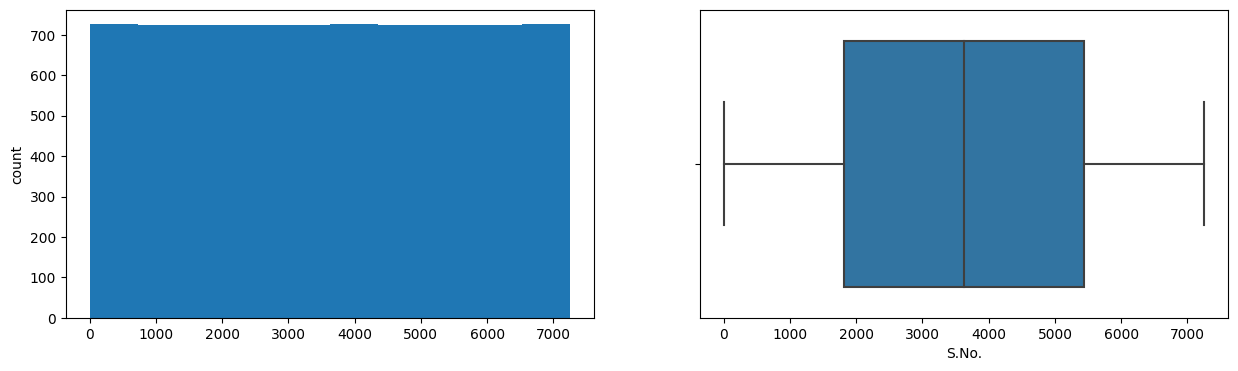

Year
Skew : -0.84


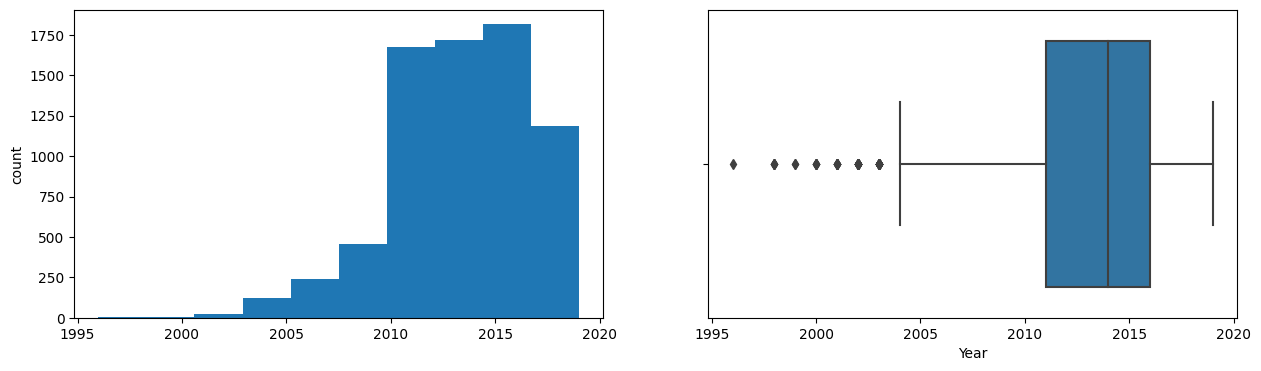

Kilometers_Driven
Skew : 61.58


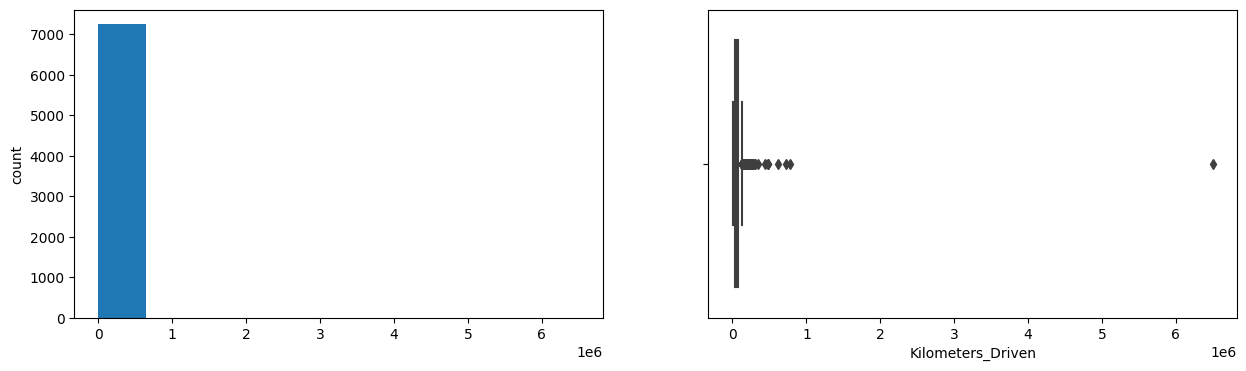

Seats
Skew : 1.9


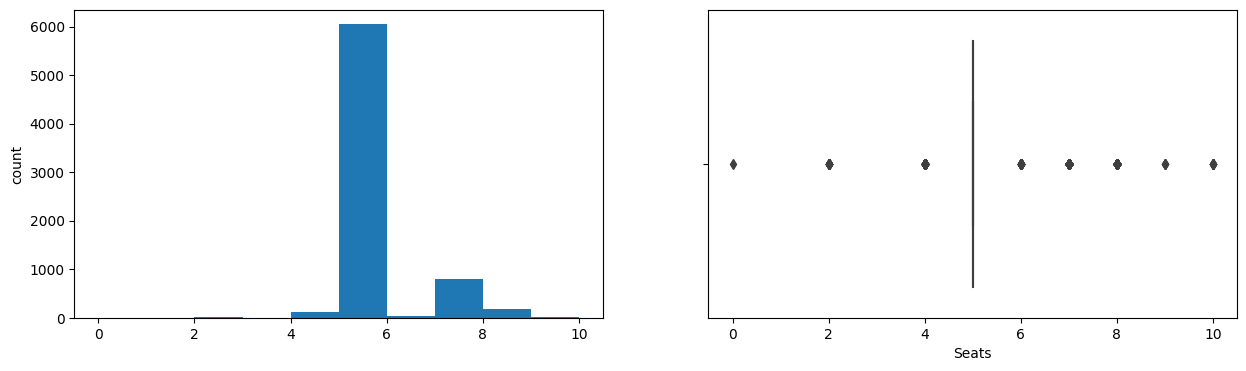

Price
Skew : 3.34


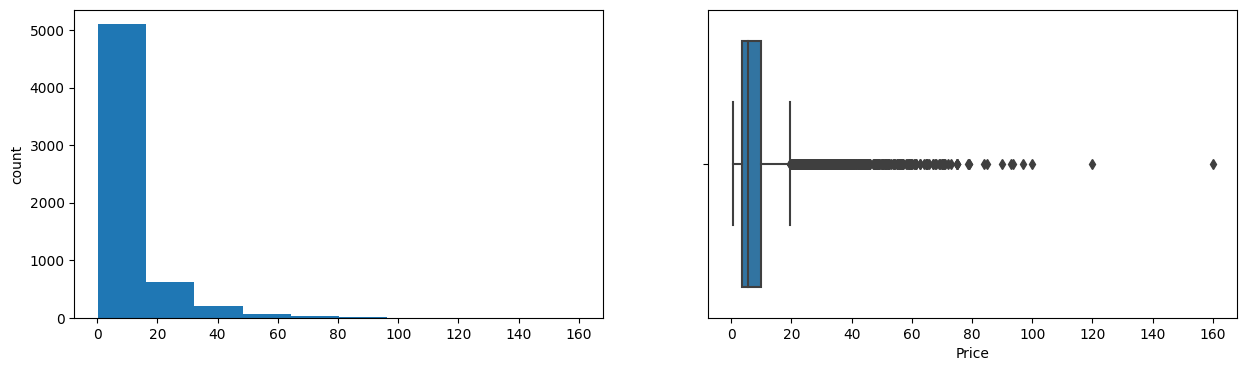

Used_Car_Age
Skew : 0.84


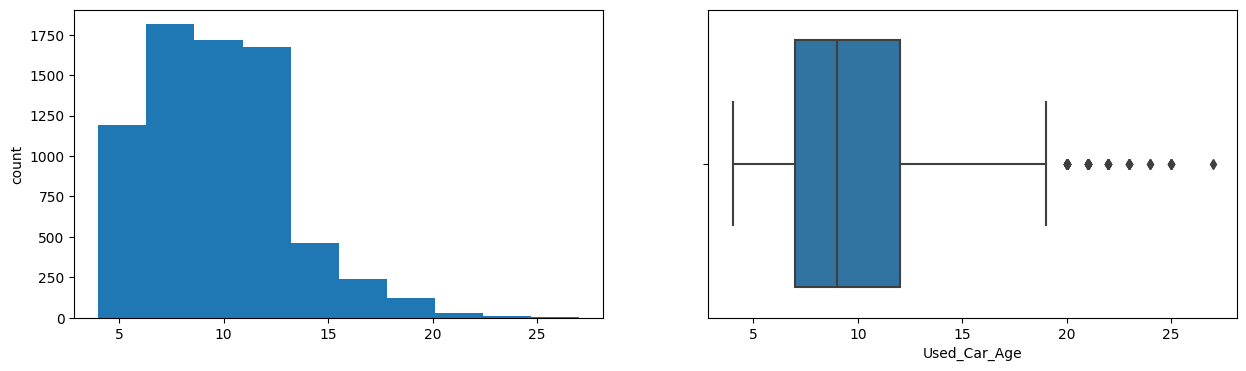

In [19]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize= (15, 4))
    plt.subplot(1,2,1)
    data[col].hist(grid =False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = data[col])
    plt.show()

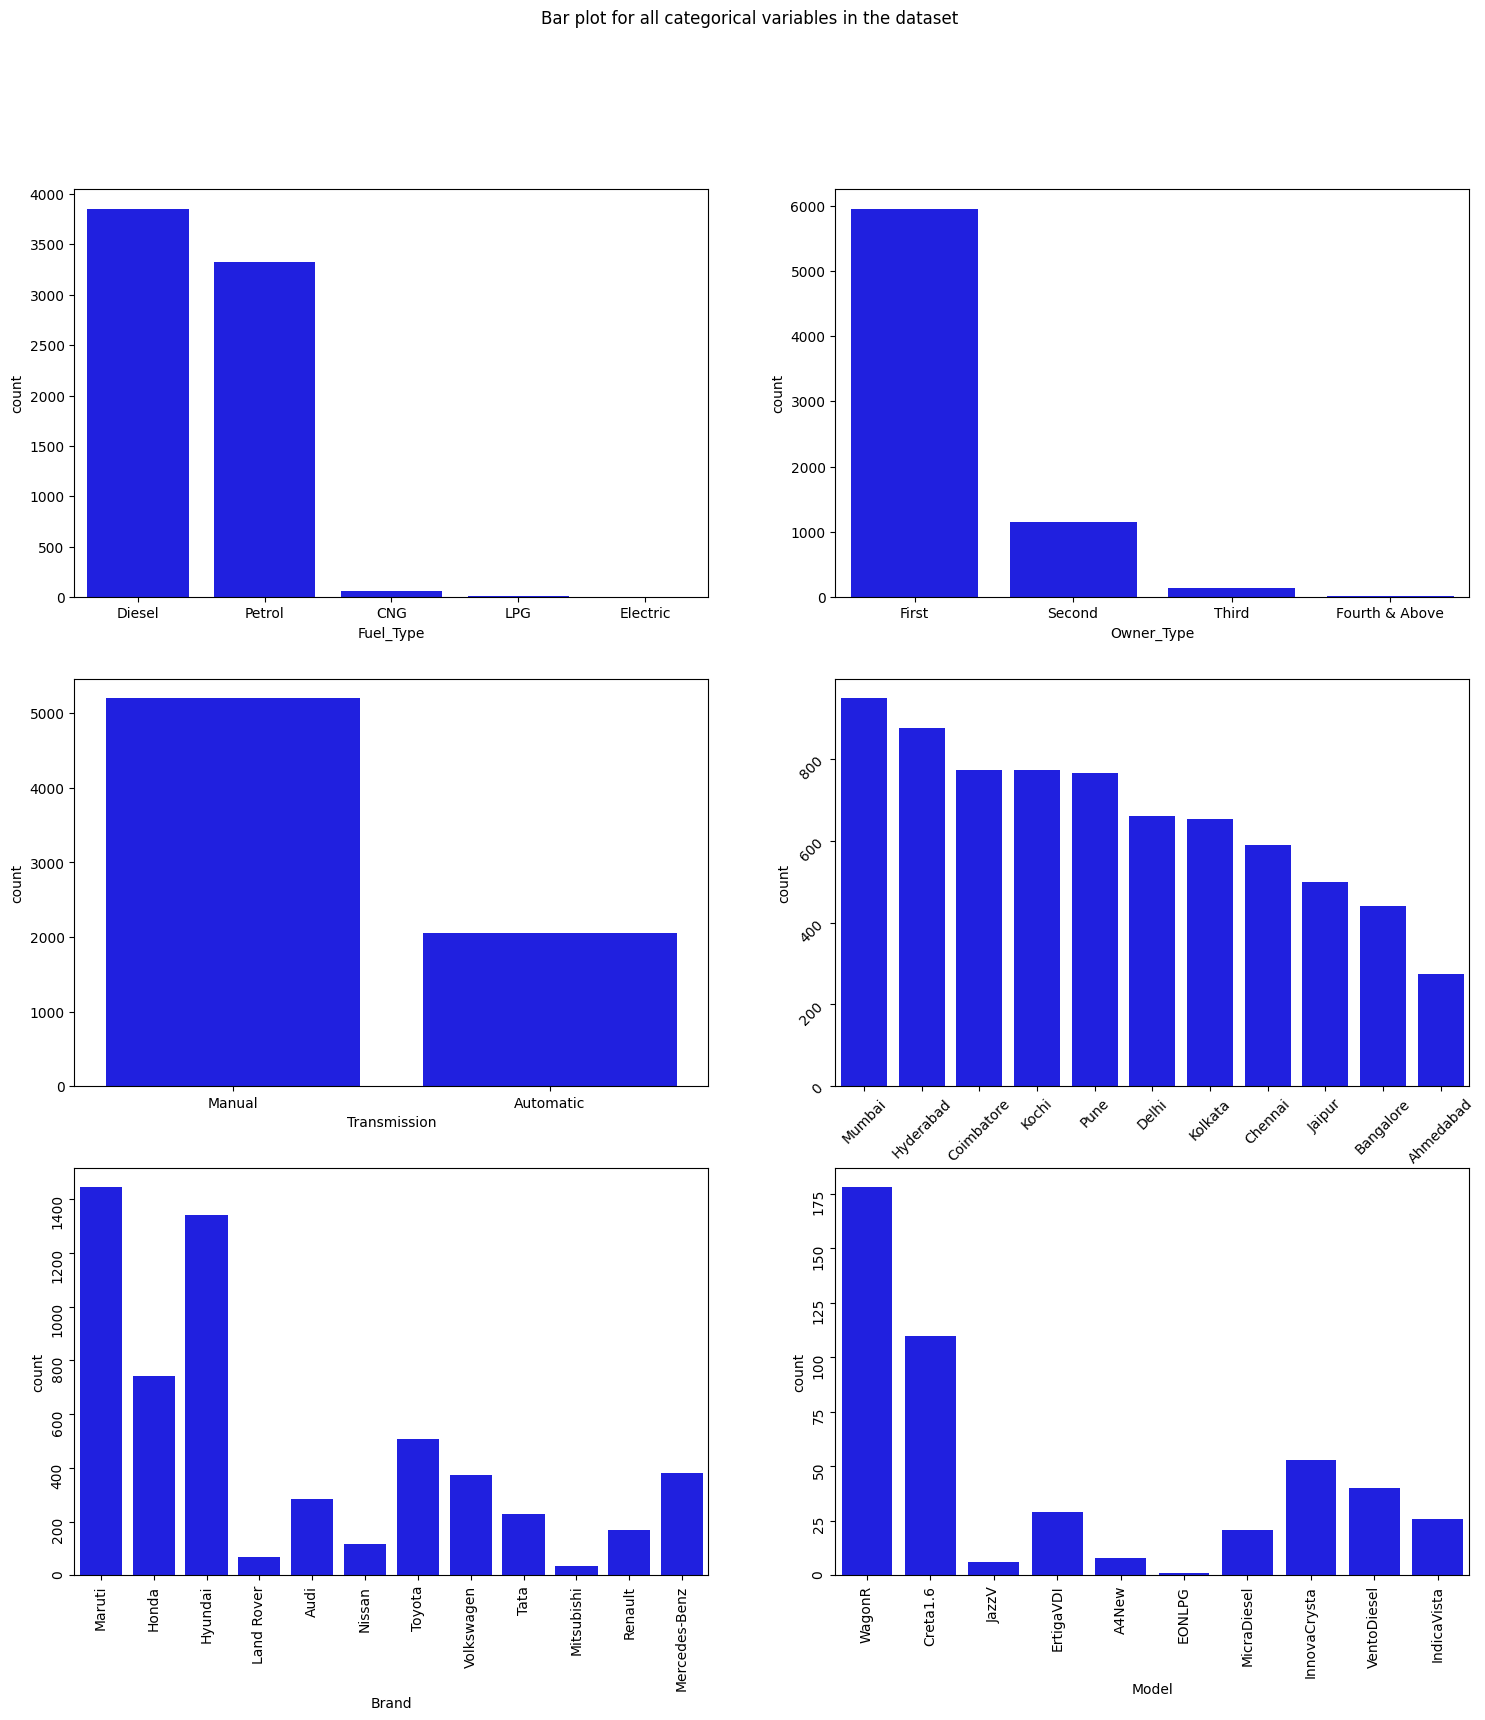

In [26]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Owner_Type', data = data, color = 'blue', order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Transmission', data = data, color = 'blue', order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(10).value_counts().index);
axes[1][1].tick_params(labelrotation = 45);
axes[2][0].tick_params(labelrotation = 90);
axes[2][1].tick_params(labelrotation = 90);

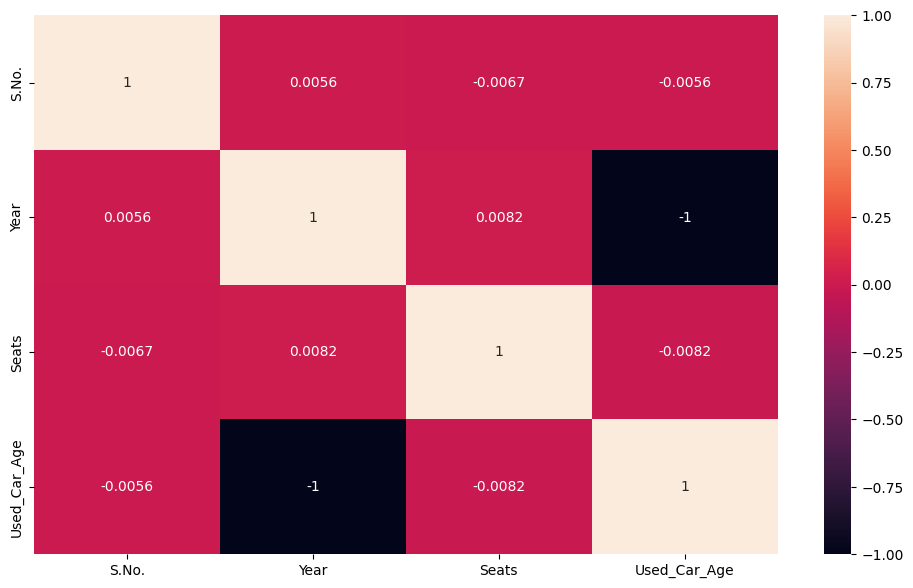

In [21]:
plt.figure(figsize =(12,7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'], axis = 1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

<Figure size 1300x1700 with 0 Axes>

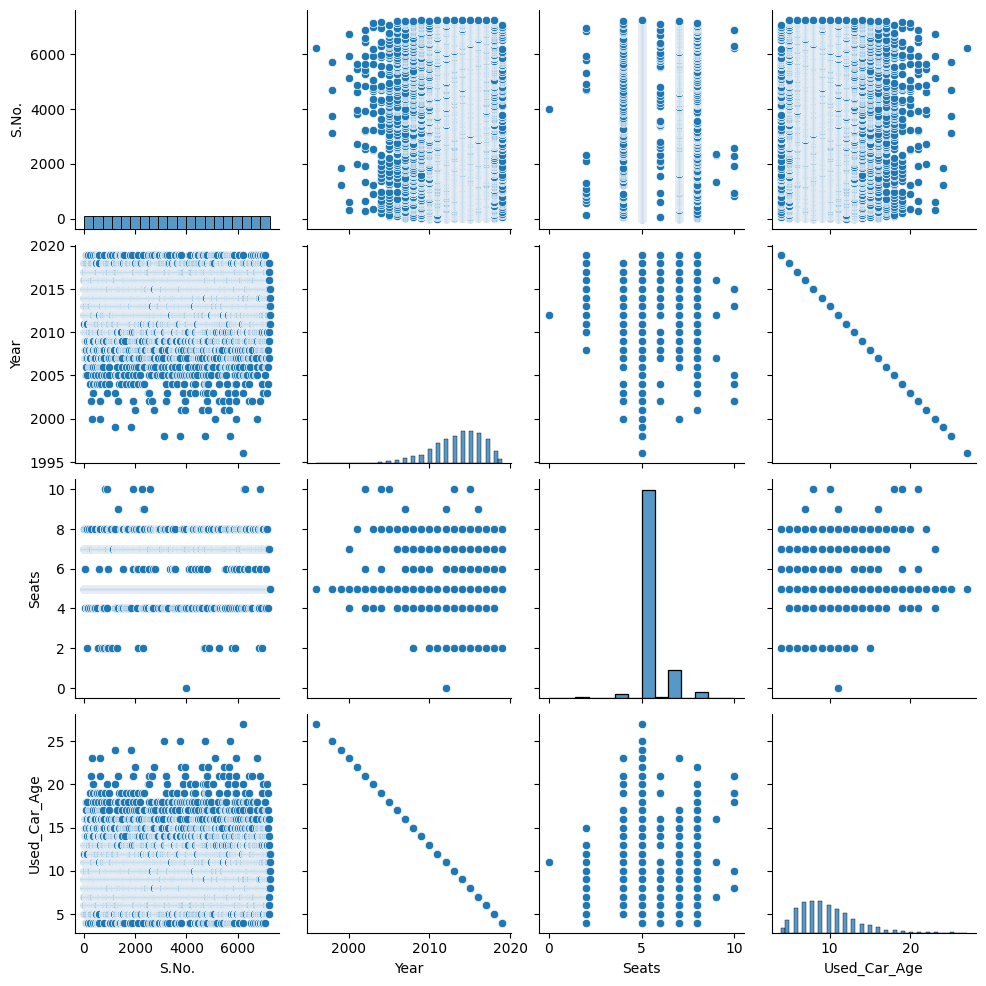

In [22]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No.                  7253 non-null   int64  
 1   Name                   7253 non-null   object 
 2   Location               7253 non-null   object 
 3   Year                   7253 non-null   int64  
 4   Kilometers_Driven      7253 non-null   int64  
 5   Fuel_Type              7253 non-null   object 
 6   Transmission           7253 non-null   object 
 7   Owner_Type             7253 non-null   object 
 8   Mileage                7251 non-null   object 
 9   Engine                 7207 non-null   object 
 10  Power                  7207 non-null   object 
 11  Seats                  7200 non-null   float64
 12  New_Price              1006 non-null   object 
 13  Price                  6019 non-null   float64
 14  Used_Car_Age           7253 non-null   int64  
 15  Bran

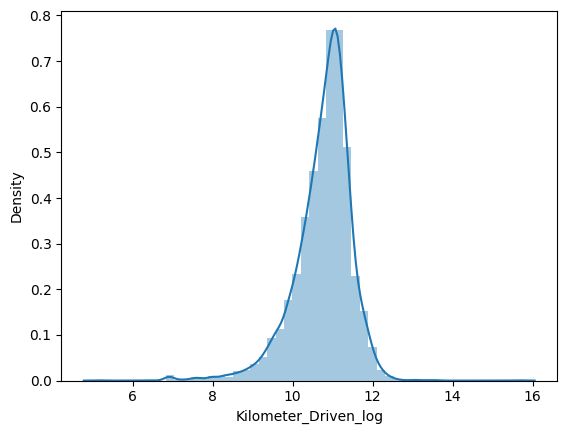

In [23]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname +'_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()
log_transform(data,['Kilometers_Driven','Price'])
sns.distplot(data['Kilometers_Driven_log'], axlabel = "Kilometer_Driven_log");

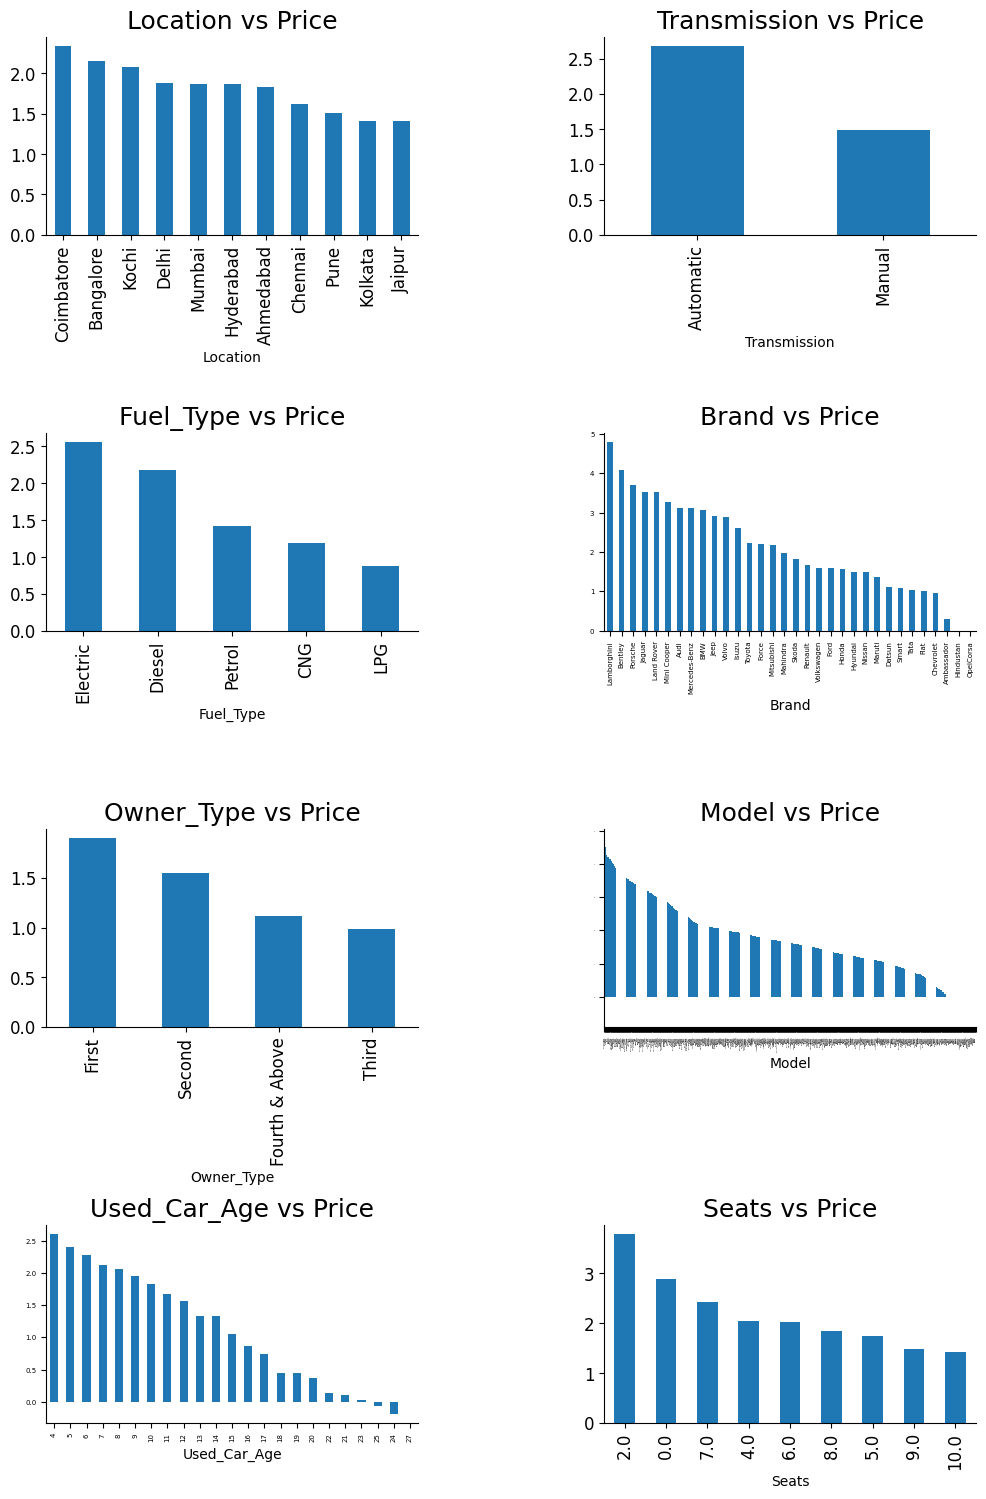

In [27]:
fig, axarr = plt.subplots(4,2, figsize=(12,18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[0][0], fontsize = 12)
axarr[0][0].set_title('Location vs Price', fontsize =18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[0][1], fontsize = 12)
axarr[0][1].set_title('Transmission vs Price', fontsize =18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[1][0], fontsize = 12)
axarr[1][0].set_title('Fuel_Type vs Price', fontsize =18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[1][1], fontsize = 5)
axarr[1][1].set_title('Brand vs Price', fontsize =18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[2][0], fontsize = 12)
axarr[2][0].set_title('Owner_Type vs Price', fontsize =18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[2][1], fontsize = 1)
axarr[2][1].set_title('Model vs Price', fontsize =18)
data.groupby('Used_Car_Age')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[3][0], fontsize = 5)
axarr[3][0].set_title('Used_Car_Age vs Price', fontsize =18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax=axarr[3][1], fontsize = 12)
axarr[3][1].set_title('Seats vs Price', fontsize =18)
plt.subplots_adjust(hspace = 1.0)
plt.subplots_adjust(wspace = .5)
sns.despine()